# Comparison of Two Groups

Another common data analysis task is to compare two (or more) data sets to one another, rather than comparing a single data set to some theoretical or expected values.

In this workbook, we will investigate how to handle this situation.  We already have a lot of the tools and concepts available to us, fortunately!

# Example 1 - Paired t-Test

In many experiments, we have two data sets that represent "before" and "after" data for a set of subjects.  In this kind of situation, we want to look at the DIFFERENCE between the before data and the after data, and make a statement about whether anything has changed (either an increase or a decrease).

In [1]:
# Import the required packages, 
# with their conventional names 
import matplotlib.pyplot as plt 
import numpy as np 
import scipy.stats as stats 

# Step 1:  Collect data

scores_before = np.array([109.4,76.2,128.7,93.7,85.6,117.7,117.2,87.3,100.3,55.1])
scores_after = np.array([119.3,77.3,131.3,95.3,86.3,122.3,117.3,87.9,108.2,56.3])

difference = scores_after - scores_before

print (difference)

[9.9 1.1 2.6 1.6 0.7 4.6 0.1 0.6 7.9 1.2]


In [2]:
xbar = difference.mean()
sem = stats.sem(difference)
df = len(difference)-1

In [3]:
# Step 2:  Null hypothesis
# "The expected value of the difference is 0.  We assume that there is no difference between
#  the population means before and after."
#
#  Thus, we are considering the "=" case.  We are testing whether or not the data
#  supports the null hypothesis that "mu=0".
#
#  Extreme values would correspond to a difference means that is EITHER much larger than
#  0, or much smaller than 0.

mu = 0

In [4]:
# Step 3:  Test statistic
# Since the value of sigma is unknown, and we are interested in the mean of the 
# distribution, we choose the t-statistic.

alpha = 0.05

tvalue = (xbar-mu)/sem

print ("Expected difference mean = %0.2f" % mu)
print ("Mean Value from difference data = %0.2f" % xbar)
print ("Standard Error in the mean = %0.2f" %sem)
print ("T value from difference data = %0.2f" %tvalue)

# Step 4: Calculate the critical t-values, and the p-value.
tdist = stats.t(df)
tlow = tdist.ppf(alpha/2.0)
thigh = tdist.ppf(1-alpha/2.0)

print ("Critical T values = %0.2f, %0.2f" % (tlow,thigh))

# NOTE:  We have to multiply by two in this base ("="), because we have to take
#        into account the upper tail as well as the lower tail.
#
pvalue = 2.0*tdist.cdf(-np.abs(tvalue))

print ("P value = %0.3f" % pvalue)

# Step 5:  Conclusion
#
# a) Since the t-value from the data (2.84) falls outside two limits from the
#    t-distribution (-2.26 to 2.26), we conclude that the data is inconsistent with
#    a population mean of 0, and we REJECT THE NULL HYPOTHESIS.
# b) Since the p-value is LESS THAN alpha, we reject the null hypothesis.

Expected difference mean = 0.00
Mean Value from difference data = 3.03
Standard Error in the mean = 1.07
T value from difference data = 2.84
Critical T values = -2.26, 2.26
P value = 0.019


In [5]:
cl = 1 - alpha
c_interval = stats.t.interval(cl,df,loc=xbar,scale=sem)

print ("95 Percent Confidence Interval = (%0.3f,%0.3f)" % c_interval)
print ("The data is consistent with any value of mu between %0.3f and %0.3f, at the 95 Percent confidence level." % c_interval)

# The stats package has some cool built-in functions to get the pValue for a single sample t-test quickly!!!!
# The two parameters passed to this function are (a) the original data array, and (b) the value of mu to test.
# The function assumes a TWO-TAILED test (i.e. the "=" case).

t, pVal = stats.ttest_1samp(difference,mu)
print ("T-value = %0.3f, P-value = %0.3f" % (t,pVal))

t, pVal = stats.ttest_1samp(difference,c_interval[0])
print ("T-value = %0.3f, P-value = %0.3f" % (t,pVal))

t, pVal = stats.ttest_1samp(difference,c_interval[1])
print ("T-value = %0.3f, P-value = %0.3f" % (t,pVal))

# There is also another function in the stats package that can do the calculation all in one step!!!!

t, pVal = stats.ttest_rel(scores_after,scores_before)
print ("T-value = %0.3f, P-value = %0.3f" % (t,pVal))

95 Percent Confidence Interval = (0.615,5.445)
The data is consistent with any value of mu between 0.615 and 5.445, at the 95 Percent confidence level.
T-value = 2.838, P-value = 0.019
T-value = 2.262, P-value = 0.050
T-value = -2.262, P-value = 0.050
T-value = 2.838, P-value = 0.019


# Example 2 - Two Sample t-Test

In this case, we have two data sets that represent two separate and distinct samples that we assume are from the SAME population.  In this kind of situation, we want to assess whether or not this assumption is correct.  That is, are the predicted population means from the two samples consistent with one another.

In [6]:
# Step 1:  Collect data

scores_one = np.array([109.4,76.2,128.7,93.7,85.6,117.7,117.2,87.3,100.3,55.1])
scores_two = np.array([119.3,77.3,131.3,95.3,86.3,122.3,117.3,87.9,108.2,56.3])

n1 = len(scores_one)
n2 = len(scores_two)

s1 = scores_one.std(ddof=1)
s2 = scores_two.std(ddof=1)

xbar1 = scores_one.mean()
xbar2 = scores_two.mean()

# Calculate the standard error in the mean ... this is the weighted average of
# the std. deviations of the two (independent) samples.
sem = np.sqrt(s1**2/n1+s2**2/n2)

# Step 2:  Null hypothesis
# "The expectation is that the two means are the same.  We assume that there is no difference between
#  the population means of the two samples.
#
#  Thus, we are considering the "=" case.  We are testing whether or not the data
#  supports the null hypothesis.

mu1 = 0
mu2 = 0

# Step 3:  Test statistic
# Since the value of sigma is unknown, and we are interested in the mean of the 
# distribution, we choose the t-statistic.

alpha = 0.05

tvalue = ((xbar1-xbar2)-(mu1-mu2))/sem

print ("Expected population means = %0.2f, %0.2f" % (mu1,mu2))
print ("Mean Values from data = %0.2f, %0.2f" % (xbar1,xbar2))
print ("Standard Error in the mean = %0.2f" %sem)
print ("T value from data = %0.3f" %tvalue)

# Step 4: Calculate the critical t-values, and the p-value.
df = n1+n2-2
tdist = stats.t(df)
tlow = tdist.ppf(alpha/2.0)
thigh = tdist.ppf(1-alpha/2.0)

print ("Critical T values = %0.3f, %0.3f" % (tlow,thigh))

# NOTE:  We have to multiply by two in this base ("="), because we have to take
#        into account the upper tail as well as the lower tail.
#
pvalue = 2.0*tdist.cdf(-np.abs(tvalue))

print ("P value from data = %0.3f" %pvalue)

# Now, the easy way!!!!

t, pVal = stats.ttest_ind(scores_one,scores_two)
print ("T-value = %0.3f, P-value = %0.3f" % (t,pVal))

# Sometimes, we do not have the raw data, but only the summary data
t, pVal = stats.ttest_ind_from_stats(xbar1,s1,n1,xbar2,s2,n2)
print ("T-value = %0.3f, P-value = %0.3f" % (t,pVal))

Expected population means = 0.00, 0.00
Mean Values from data = 97.12, 100.15
Standard Error in the mean = 10.23
T value from data = -0.296
Critical T values = -2.101, 2.101
P value from data = 0.771
T-value = -0.296, P-value = 0.771
T-value = -0.296, P-value = 0.771


# Example 3 - Two Sample t-Test with Statistical Modeling¶

The data here are similar to the last example, but our analysis is going to be somewhat different.  We will take advantage of some of the stats package modeling utilities.

[ 79. 100.  93.  75.  84. 107.  66.  86. 103.  81.  83.  89. 105.  84.
  86.  86. 112. 112. 100.  94.] [ 92. 100.  76.  97.  72.  79.  94.  71.  84.  76.  82.  57.  67.  78.
  94.  83.  85.  92.  76.  88.]
T-value = 2.435, P-value = 0.020
T-value = 2.304, P-value = 0.033


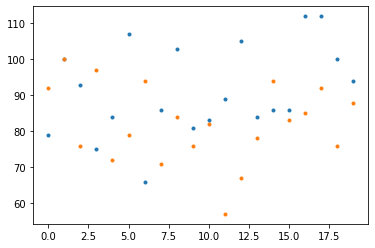

In [7]:
# Step 1 - Collect data

np.random.seed(123)
race_1 = np.round(np.random.randn(20)*10 + 90)
race_2 = np.round(np.random.randn(20)*10 + 85)

print (race_1,race_2)

plt.plot(race_1,'.')
plt.plot(race_2,'.')

# Step 2 - Use stats utilities as in the last example

t, pVal = stats.ttest_ind(race_1,race_2)
print ("T-value = %0.3f, P-value = %0.3f" % (t,pVal))

# Step 3 - What about if we use a paired t-Test?

t, pVal = stats.ttest_rel(race_1,race_2)
print ("T-value = %0.3f, P-value = %0.3f" % (t,pVal))


Now let's instead use a cool package from stats called OLS - Ordinary Least Squares.  We will talk more about the methodolgy later, but for now we are just interested in the t- and p-values.

In [8]:
import pandas as pd
import statsmodels.formula.api as sm

np.random.seed(123)
df = pd.DataFrame({'Race1': race_1, 'Race2': race_2})

result = sm.ols(formula='I(Race2-Race1) ~ 1', data=df).fit()

print (result.summary())

                            OLS Regression Results                            
Dep. Variable:       I(Race2 - Race1)   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 18 Aug 2020   Prob (F-statistic):                nan
Time:                        10:18:16   Log-Likelihood:                -85.296
No. Observations:                  20   AIC:                             172.6
Df Residuals:                      19   BIC:                             173.6
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.1000      3.950     -2.304      0.0

# Example 4 - Comparing the Variances of Two Samples¶

Another question that we can ask is:  Are the variances/standard deviations of the two samples consistent
with being drawn from a single population?  That is, are they equal to one another?

The test statistic that is used to make this comparison is called the F statistic, or F test, and is
defined as:

$F = \frac{s_1^2}{s_2^2}$

The F-distribution is, perhaps not surprisingly, similar in shape and character to the $\chi^2$ distribution, as
it is the ratio of two variances.

Half of the distribution lies below F=1, and the other half lies above F=1.  The distribution depends on the number of degrees of freedom of $both$ samples.

In [40]:
scores_one = np.array([109.4,76.2,128.7,93.7,85.6,117.7,117.2,87.3,100.3,55.1])
scores_two = np.array([119.3,77.3,131.3,95.3,86.3,122.3,117.3,87.9,108.2,56.3])

n1 = len(scores_one)
n2 = len(scores_two)

dof1 = n1-1
dof2 = n2-1

s1 = scores_one.std(ddof=1)
s2 = scores_two.std(ddof=1)

xbar1 = scores_one.mean()
xbar2 = scores_two.mean()

fvalue = s1**2/s2**2

print ("Standard Deviations of the two samples = %.1f, %.1f" %(s1,s2))
print ("Variances of the two samples = %.1f, %.1f" %(s1**2,s2**2))
print ("F statistic = %0.3f" % fvalue)

alpha = 0.05

fdist = stats.f(dof1,dof2)
flow = fdist.ppf(alpha/2)
fhigh = fdist.ppf(1-alpha/2)

print ("Critical F-values = %0.3f, %0.3f" % (flow,fhigh))

if (fvalue > 1):
    pvalue = 2.0*(1-fdist.cdf(fvalue))
else:
    pvalue = 2.0*fdist.cdf(fvalue)
    
print ("Pvalue = %0.3f" % (pvalue))

Standard Deviations of the two samples = 22.2, 23.6
Variances of the two samples = 492.1, 555.2
F statistic = 0.886
Critical F-values = 0.248, 4.026
Pvalue = 0.860


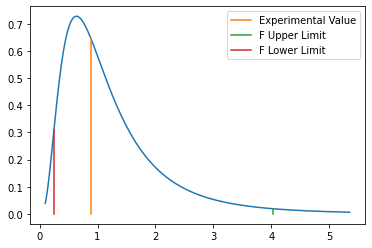

In [41]:
# As usual, let's draw some pictures to get a sense of what these numbers mean

# Define an x-axis array that spans the region from 0.001 to 0.99 of the distribution, in 1000 steps
xlow = stats.f.ppf(0.001,dof1,dof2)
xhigh = stats.f.ppf(0.99,dof1,dof2)
x = np.linspace(xlow, xhigh, 1000)
# Get an F distribution over this range of x
f_dist = stats.f.pdf(x,dof1,dof2)
plt.plot(x,f_dist)

# Plot vertical lines at the critical F values, and the experimental f value
f_stat_line_x = np.array([fvalue,fvalue])
f_stat_line_y = np.array([0,stats.f.pdf(fvalue,dof1,dof2)])

f_lower_line_x = np.array([flow,flow])
f_lower_line_y = np.array([0,stats.f.pdf(flow,dof1,dof2)])

f_upper_line_x = np.array([fhigh,fhigh])
f_upper_line_y = np.array([0,stats.f.pdf(fhigh,dof1,dof2)])

plt.plot(f_stat_line_x,f_stat_line_y,label="Experimental Value")
plt.plot(f_upper_line_x,f_upper_line_y,label="F Upper Limit")
plt.plot(f_lower_line_x,f_lower_line_y,label="F Lower Limit")
plt.legend()